In [1]:

from glob import glob
from PIL import Image
import numpy as np
from natsort import natsorted

from utils import make_rgb_indices, rplan_map

In [2]:
IMG_PATH = '/mnt/iscratch/datasets/rplan_ddg_var/0/'

IMAGES = natsorted(glob(IMG_PATH + '*_nodoor.png'))

In [3]:
img_pil = Image.open(IMAGES[0])
img_np = np.array(img_pil)
img_idx = make_rgb_indices(img_np, rplan_map)


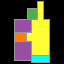

In [4]:
img_pil

In [5]:
from scipy import ndimage

kernel = np.array([[1, -1]])
img_gradh = ndimage.correlate(img_idx, kernel)

kernel_v = np.array([[1], [-1]])
img_gradv = ndimage.correlate(img_idx, kernel_v)


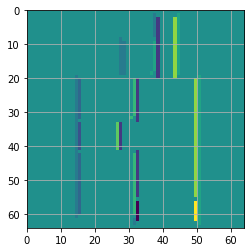

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img_gradh, interpolation='nearest', extent=(0, 64, 64, 0))
plt.grid(True)



In [7]:

np.unique(img_gradh)

array([-6., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  6.])

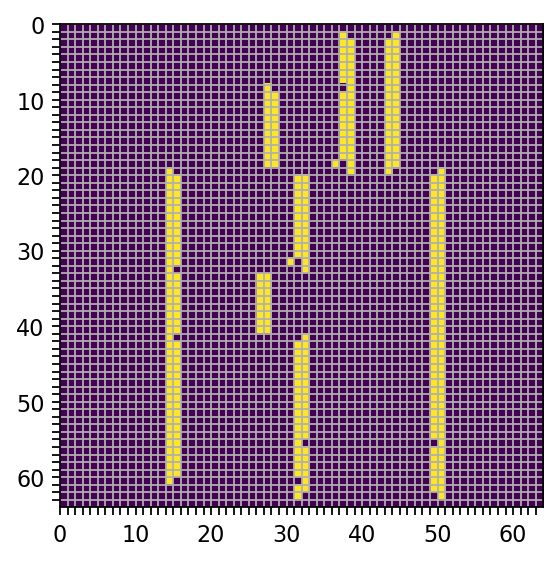

In [8]:
def div_by_10(ii):
    return str(ii) if ii % 10 == 0 else ''

threshed = img_gradh.copy()
threshed[threshed != 0] = 1

plt.figure(dpi=160)
plt.imshow(threshed, interpolation='nearest', extent=(0, 64, 64, 0))
plt.grid(True)
_ = plt.gca().set_xticks(np.arange(64))
_ = plt.gca().set_xticklabels([div_by_10(ii) for ii in range(64)])
_ = plt.gca().set_yticks(np.arange(64))
_ = plt.gca().set_yticklabels([div_by_10(ii) for ii in range(64)])
_ = plt.gca().set


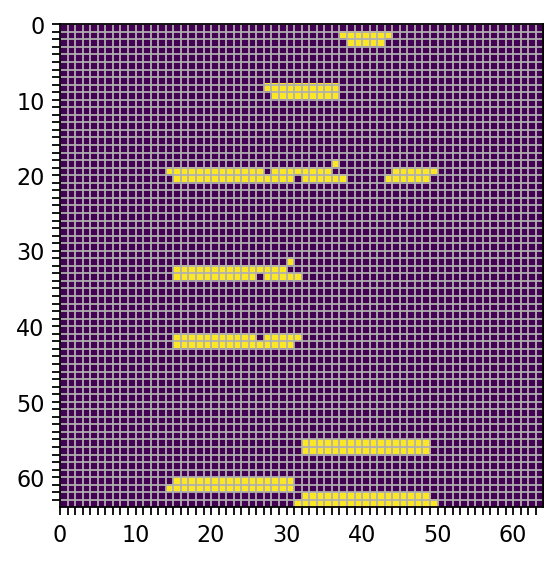

In [9]:
def div_by_10(ii):
    return str(ii) if ii % 10 == 0 else ''

threshed_v = img_gradv.copy()
threshed_v[threshed_v != 0] = 1

plt.figure(dpi=160)

plt.imshow(threshed_v, interpolation='nearest', extent=(0, 64, 64, 0))
plt.grid(True)
_ = plt.gca().set_xticks(np.arange(64))
_ = plt.gca().set_xticklabels([div_by_10(ii) for ii in range(64)])
_ = plt.gca().set_yticks(np.arange(64))
_ = plt.gca().set_yticklabels([div_by_10(ii) for ii in range(64)])

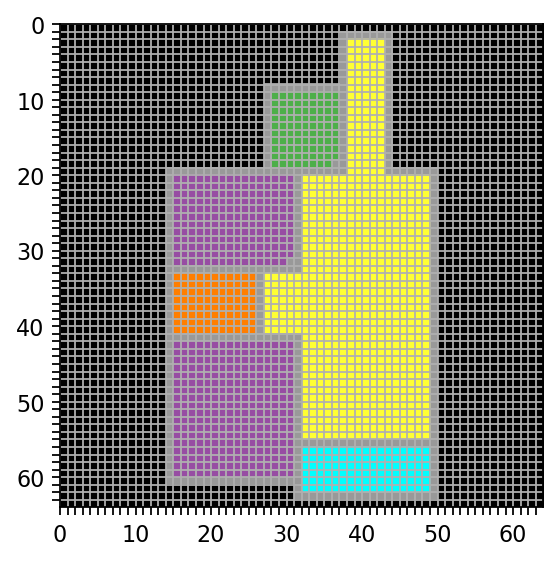

In [10]:
plt.figure(dpi=160)

plt.imshow(rplan_map[img_idx.astype(np.uint8)], interpolation='nearest', extent=(0, 64, 64, 0), vmin=0, vmax=12, cmap=plt.cm.Pastel2)
plt.grid(True)
_ = plt.gca().set_xticks(np.arange(64))
_ = plt.gca().set_xticklabels([div_by_10(ii) for ii in range(64)])
_ = plt.gca().set_yticks(np.arange(64))
_ = plt.gca().set_yticklabels([div_by_10(ii) for ii in range(64)])
_ = plt.gca().set

(64.0, 0.0)
(0.0, 64.0)
(64.0, 0.0)
(64.0, 0.0)
(0.0, 64.0)
(64.0, 0.0)
(64.0, 0.0)
(0.0, 64.0)
(64.0, 0.0)


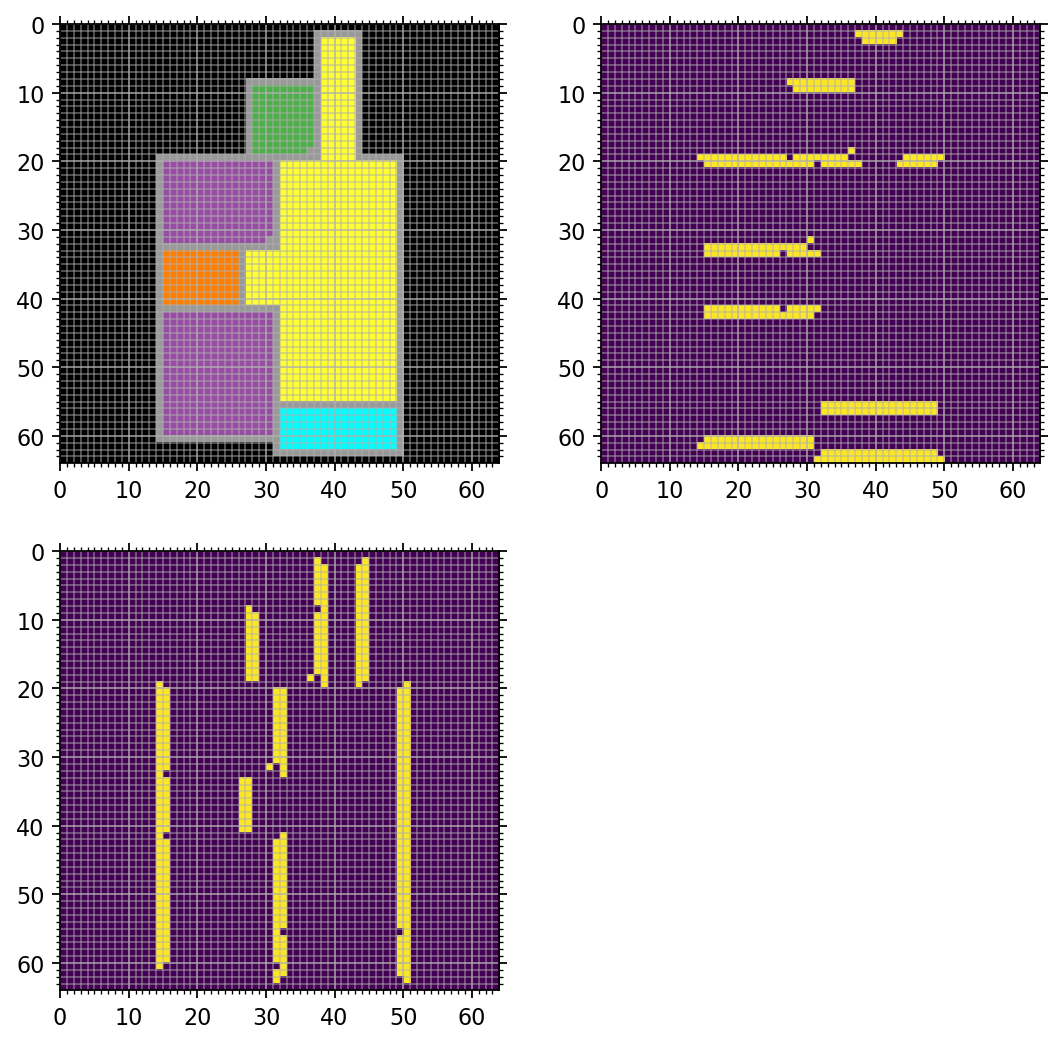

In [146]:
f, ax = plt.subplots(2, 2, dpi=160, figsize=(8,8), sharex=False, sharey=False)
show_with_grid(rplan_map[img_idx.astype(np.uint8)], ax[0, 0])
show_with_grid(threshed, ax[1, 0])
show_with_grid(threshed_v, ax[0, 1])

ax[1, 1].set_visible(False)

aa  = ax[1, 1]

In [ ]:
aa.

In [147]:
# okay so it seems like the non-zero lines align with a change in the category. Let us now see
# how to use that to create a datastructure to do what we need

np.unique(threshed)
threshed_sum = np.sum(threshed, axis=0)
threshed_nz = np.nonzero(threshed_sum)
threshed_nz



(array([14, 15, 26, 27, 28, 30, 31, 32, 36, 37, 38, 43, 44, 49, 50]),)

In [149]:
np.unique(threshed)
threshed_v_sum = np.sum(threshed_v, axis=1)
threshed_v_nz = np.nonzero(threshed_v_sum)
threshed_v_nz

(array([ 1,  2,  8,  9, 18, 19, 20, 31, 32, 33, 41, 42, 55, 56, 60, 61, 62,
        63]),)

In [ ]:
### Testing
